In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Мы будем работать с данными агрегатора такси [Sigma Cabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). В зависимости от характеристик поездки требуется предсказать один из трех типов повышенного ценообразования: [1, 2, 3]. Таким образом, это поможет компании оптимально мэтчить такси и клиентов. 

In [41]:
df = pd.read_csv('sigma_cabs.csv')
df.shape

(131662, 14)

In [42]:
# Занесем индекс колонку
df = df.set_index('Trip_ID')
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [43]:
df.Surge_Pricing_Type.value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

Описание признаков:

1. **Trip_ID**: ID for TRIP
2. **Trip_Distance**: The distance for the trip requested by the customer
3. **TypeofCab**: Category of the cab requested by the customer
4. **CustomerSinceMonths**: Customer using cab services since n months; 0 month means current month
5. **LifeStyleIndex**: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. **ConfidenceLifeStyle_Index**: Category showing confidence on the index mentioned above
7. **Destination_Type**: Sigma Cabs divides any destination in one of the 14 categories.
8. **Customer_Rating**: Average of life time ratings of the customer till date
9. **CancellationLast1Month**: Number of trips cancelled by the customer in last 1 month
10. **Var1**, **Var2** and **Var3**: Continuous variables masked by the company. Can be used for modelling purposes
11. **Gender**: Gender of the customer

**SurgePricingType**: Target (can be of 3 types)


1. **Trip_ID**: идентификатор ПОЕЗДКИ
2. **Trip_Distance**: Расстояние для поездки, запрошенное клиентом.
3. **Тип такси**: Категория машины, запрошенная заказчиком
4. **Клиент с нескольких месяцев**: Клиент, пользующийся услугами такси с n месяцев; 0 месяцев означает текущий месяц.
5. **Индекс образа жизни**: Собственный индекс, созданный Sigma Caps, показывающий образ жизни клиента на основе его поведения.
6. **Индекс уверенности в жизни**: Категория, показывающая уверенность по указанному выше индексу
7. **Destination_Type**: Sigma Cabs делит любой пункт назначения на одну из 14 категорий.
8. **Customer_Rating**: Среднее значение пожизненных оценок клиента до настоящего времени
9. **Отмена бронирования за последний 1 месяц**: Количество поездок, отмененных клиентом за последний 1 месяц.
10. **Var1**, **Var2** и **Var3**: непрерывные переменные, маскируемые компанией. Может использоваться для целей моделирования
11. **Пол**: Пол клиента

****Тип повышенного ценообразования** (**SurgePricingType**): Таргет (может быть 3-х типов)

### EDA 
Заполните пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом. Изобразите марицу корреляций и выведите топ5 пар самых коррелированных признаков.

Так как в сумме уникальных значений различных категориальных признаков окажется не супер-много, примените `One-Hot-Encoding` для них. Не забудьте в методе `pd.get_dummies` указать параметр `drop_first=True`.

In [44]:
### Your code is here
### посмотрим в общем на вещественные признаки, пропуски
print(df.shape)
df.describe()

(131662, 13)


,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [45]:
### Посмотрим на некатегориальные колонки

numeric_columns = df.loc[:,df.dtypes!=np.object_].columns
print(numeric_columns)
df.loc[:,df.dtypes!=np.object_].head(3)

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'],
      dtype='object')


,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_ID,,,,,,,,,
T0005689460,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2
T0005689461,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2
T0005689464,41.58,10.0,NaN,3.50125,2,NaN,56,77,2


In [46]:
### заполним пропуски в некотегориальных(вещественных) колонках медианным значением
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

In [47]:
df.isna().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months              0
Life_Style_Index                   0
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                               0
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [48]:
### работа с категориальными признаками

categorical_columns = df.loc[:,df.dtypes==np.object_].columns
print(categorical_columns)
df.loc[:,df.dtypes!=np.object_].head(3)

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Gender'],
      dtype='object')


,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_ID,,,,,,,,,
T0005689460,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2
T0005689461,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2
T0005689464,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2


In [49]:
df.describe(include=object)

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,111452,111469,131662,131662
unique,5,3,14,2
top,B,B,A,Male
freq,31136,40355,77597,93900


In [50]:
# пропуски в categorical_columns
df[categorical_columns].isna().sum()

Type_of_Cab                    20210
Confidence_Life_Style_Index    20193
Destination_Type                   0
Gender                             0
dtype: int64

In [51]:
# заполним пропуски в категориальных колонках
for col in categorical_columns:
    most_recent = df.groupby(col).size().sort_values().index[-1]
    df[col] = df[col].fillna(most_recent)

In [52]:
df[categorical_columns].isna().sum()

Type_of_Cab                    0
Confidence_Life_Style_Index    0
Destination_Type               0
Gender                         0
dtype: int64

In [53]:
for col in categorical_columns:
    one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)

In [54]:
df.isna().sum().sum(), df.shape

(0, (131662, 29))

In [55]:
### матрица корреляций
df.loc[:,df.dtypes!=np.object_].corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_Distance,1.000000,0.114413,0.468332,-0.054654,-0.007686,-0.031388,0.200456,0.231706,0.135928,-0.049238,...,0.010783,-0.078761,-0.065450,-0.067025,-0.070772,-0.032169,0.006428,-0.009844,-0.027335,0.002173
Customer_Since_Months,0.114413,1.000000,0.119279,-0.048969,-0.006180,-0.000977,0.041814,0.110851,0.027194,-0.002355,...,-0.020596,-0.023704,-0.005812,-0.038896,0.001861,-0.033298,-0.011319,0.001978,-0.021416,0.001326
Life_Style_Index,0.468332,0.119279,1.000000,0.189165,0.068188,-0.045710,0.215944,0.303324,-0.073692,-0.002509,...,0.021958,-0.027208,-0.008661,-0.018124,-0.015995,-0.006097,0.003144,0.008153,-0.026124,0.000626
Customer_Rating,-0.054654,-0.048969,0.189165,1.000000,0.003595,-0.005398,-0.302968,-0.227531,-0.155279,0.027020,...,0.055861,0.058156,0.012988,0.022421,0.012134,0.027700,0.033101,0.010281,0.018762,0.000468
Cancellation_Last_1Month,-0.007686,-0.006180,0.068188,0.003595,1.000000,0.011711,0.095830,0.128686,0.185646,-0.051113,...,0.028450,0.004040,0.002679,0.007901,0.002417,0.011404,0.037134,0.003636,0.004370,0.002307
Var1,-0.031388,-0.000977,-0.045710,-0.005398,0.011711,1.000000,-0.025133,-0.020892,-0.013754,0.008309,...,-0.006899,0.003675,-0.001149,0.000149,0.003012,0.002711,0.002638,0.000995,-0.005564,0.000619
Var2,0.200456,0.041814,0.215944,-0.302968,0.095830,-0.025133,1.000000,0.683437,0.003437,-0.007217,...,-0.032692,-0.042712,-0.016374,-0.024090,-0.020074,-0.017317,-0.015042,-0.002572,-0.011555,0.003183
Var3,0.231706,0.110851,0.303324,-0.227531,0.128686,-0.020892,0.683437,1.000000,-0.039309,-0.003357,...,-0.025378,-0.034315,-0.007976,-0.025787,-0.016411,-0.028876,-0.007760,-0.004894,-0.016493,0.003520
Surge_Pricing_Type,0.135928,0.027194,-0.073692,-0.155279,0.185646,-0.013754,0.003437,-0.039309,1.000000,-0.155982,...,0.042104,-0.038719,0.025339,0.031573,0.017857,0.002884,0.012672,0.005622,-0.014436,0.000872
Type_of_Cab_B,-0.049238,-0.002355,-0.002509,0.027020,-0.051113,0.008309,-0.007217,-0.003357,-0.155982,1.000000,...,-0.014112,-0.000101,-0.013176,-0.011938,-0.010108,-0.000693,-0.005531,-0.002502,0.001017,-0.000635


In [56]:
### Секретные функции для фильтрации признаков
numeric_columns = df.loc[:,df.dtypes!=np.object_].columns
print(numeric_columns)

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(f"{get_top_abs_correlations(df[numeric_columns],5)}")
print(f"\n{get_top_abs_correlations(df[numeric_columns],5)[0]:.3f}")

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type', 'Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D',
       'Type_of_Cab_E', 'Confidence_Life_Style_Index_B',
       'Confidence_Life_Style_Index_C', 'Destination_Type_B',
       'Destination_Type_C', 'Destination_Type_D', 'Destination_Type_E',
       'Destination_Type_F', 'Destination_Type_G', 'Destination_Type_H',
       'Destination_Type_I', 'Destination_Type_J', 'Destination_Type_K',
       'Destination_Type_L', 'Destination_Type_M', 'Destination_Type_N',
       'Gender_Male'],
      dtype='object')
Top Absolute Correlations
Var2                           Var3                             0.683437
Confidence_Life_Style_Index_B  Confidence_Life_Style_Index_C    0.565692
Trip_Distance                  Life_Style_Index                 0.468332
Type_of_Cab_B                  Type_of_Cab_C                    0.416698

### Training

In [57]:
### разделим df на объекты с признаками и таргет
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']
y.value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [58]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

**Задание 1.** Обучите One-vs-Rest Logreg. Не забудьте в шаг добавить стандартизацию данных (через `StandardScaler`) Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg. Здесь и далее округляйте до 3 знака после запятой.

Чтобы отдельно и долго не вычислять метрики, можно воспользоваться `classification_report` из `sklearn.metrics`!

In [60]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

### Your code is here
#SGDClassifier(loss='log')
pipe = Pipeline([("scaler", StandardScaler()),
                 ("one_vs_all", OneVsRestClassifier(LogisticRegression()))
                ])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_all',
                 OneVsRestClassifier(estimator=LogisticRegression()))])

In [61]:
from sklearn.metrics import classification_report 
### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(y_true=y_test, y_pred=pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.723     0.542     0.619      5372
           2      0.636     0.834     0.722     11349
           3      0.741     0.571     0.645      9612

    accuracy                          0.679     26333
   macro avg      0.700     0.649     0.662     26333
weighted avg      0.692     0.679     0.673     26333



In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score


print(f"""Precision равно: {precision_score(y_test, 
                                            pipe.predict(X_test), 
                                            average='macro'):.3f}""" )

print(f"""Recall равно: {recall_score(y_test,
                                      pipe.predict(X_test),
                                      average='macro'):.3f}""" )

print(f"""F-мера равно: {f1_score(y_test, 
                                  pipe.predict(X_test),
                                  average='macro'):.3f}""" )

Precision равно: 0.700
Recall равно: 0.649
F-мера равно: 0.662


In [63]:
print(f"""Precision равно: {precision_score(y_test, 
                                            pipe.predict(X_test), 
                                            average='micro'):.3f}""" )

print(f"""Recall равно: {recall_score(y_test,
                                      pipe.predict(X_test),
                                      average='micro'):.3f}""" )

print(f"""F-мера равно: {f1_score(y_test, 
                                  pipe.predict(X_test),
                                  average='micro'):.3f}""" )

Precision равно: 0.679
Recall равно: 0.679
F-мера равно: 0.679


Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()` из предложенных. Для лучшего набора гиперпараметров посчитайте те же самые метрики. Валидировать параметры необходимо по `accuracy`. В этот раз проведем настояющую процедуру Кросс-Валидации! 

Для этого в метод `fit` передадим тренировочную часть наших данных, в параметр `cv` ничего не будем передавать (по дефолту 5-fold Кросс-Валидация будет проведена), а итоговые метрики замерим на тесте!

In [64]:
param_grid = {'one_vs_all__estimator__penalty': ['none', 'l2', 'elasticnet'],
              'one_vs_all__estimator__C': [0.001, 0.01, 0.1, 1]}
# установил solver='liblinear' так как без этого нет l1
## pipe.set_params(one_vs_all__estimator__solver='liblinear')
## pipe.set_params(one_vs_all__estimator__solver='lbfgs')

In [65]:
### Your code is here
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(pipe, param_grid, cv=5)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)
# GridSearchCV нашел иделальные гиперпараметры, посмотрим результат
print(classification_report(y_true=y_test, y_pred=search.predict(X_test), digits=3))


Best parameter (CV score=0.68062):
{'one_vs_all__estimator__C': 0.001, 'one_vs_all__estimator__penalty': 'l2'}
              precision    recall  f1-score   support

           1      0.742     0.534     0.621      5372
           2      0.635     0.839     0.723     11349
           3      0.742     0.576     0.649      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.664     26333
weighted avg      0.696     0.681     0.675     26333



Изобразите три калибровочные кривые для Logistic Classifier: 0-vs-rest, 1-vs-rest, 2-vs-rest. Хорошо ли откалиброван обученный классификатор? 

Заметьте, что `predict_proba` возвращает список из вероятностей для всех наших классов!

#### Калибровочные кривые

In [66]:
search.predict_proba(X_test)[:, 0]

array([0.3062245 , 0.02308103, 0.02306905, ..., 0.48673502, 0.5666375 ,
       0.13873848])

In [67]:
# Закодируем таргет 

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
y_encoder = ohe.fit_transform(y_test.values.reshape(-1, 1))
y_encoder

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

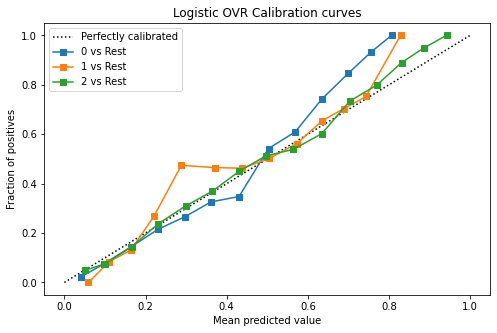

In [68]:
## Your code is here
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

# Нарисуем калибровочные кривые

for n in range(3):
    prob_pos = search.predict_proba(X_test)[:, n]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_encoder[:, n],
                                                                    prob_pos,
                                                                    n_bins=15)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label=f"{n} vs Rest")

plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.title('Logistic OVR Calibration curves')
plt.legend();

plt.show()


**Задание 2.** Обучите логистическую регрессию с гиперпараметрами из первого задания на полиномиальных признаках до 4 степени. Сравните метрики с первым заданием.


Пример: Пусть у нас был единственный признак 

$$
d_j = [1, 2, 3, 4]
$$

Тогда полиномиальные признаки до 4 степени от такого будут иметь вид:

$$
d_j^1 = [1, 2, 3, 4]
$$

$$
d_j^2 = [1, 4, 9, 16]
$$

$$
d_j^3 = [1, 8, 27, 64]
$$

$$
d_j^4 = [1, 16, 81, 256]
$$

P.S. Бинарные колонки нет смысла возводить в какие-то степени, поэтому возьмем исключительно вещественные из базовых. 

Для этого можно воспользоваться классическим циклом (или уроком из занятия про `Sberbank Housing Market`). Положите модифицированный датасет в переменную `X_polinomial`!

P.S.S Зачастую еще, создаваю полиномиальные фичи, учитывают "пересечения" признаков, то есть, например, из векторов признаков $d_j, d_i$ генерируют не просто новые степени $d_j^2, d_i^2, d_j^3, d_i^3...$, а еще и признаки вида $d_j \cdot d_i, d_j^2 \cdot d_i, d_j \cdot d_i^2...$, но здесь ограничьтесь просто степенями!

In [69]:
### Создание полиномиальных признаков из вещественных признаков в базовом DS

X_polinomial = X.copy()
X_numeric = X[['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3']]
numeric_columns_pol = X_numeric.loc[:,X_numeric.dtypes!=np.object_].columns

### Your code is here

for col in numeric_columns_pol:
    for power in [1, 2, 3, 4]:
        
        to_add = (X_polinomial[col]**power).to_frame().rename({col:f"{col}_{power}"}, axis=1)
        X_polinomial = pd.concat((X_polinomial, to_add), axis=1)

In [70]:
pd.options.display.max_columns = 500
X_polinomial.head(3)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male,Trip_Distance_1,Trip_Distance_2,Trip_Distance_3,Trip_Distance_4,Customer_Since_Months_1,Customer_Since_Months_2,Customer_Since_Months_3,Customer_Since_Months_4,Life_Style_Index_1,Life_Style_Index_2,Life_Style_Index_3,Life_Style_Index_4,Customer_Rating_1,Customer_Rating_2,Customer_Rating_3,Customer_Rating_4,Cancellation_Last_1Month_1,Cancellation_Last_1Month_2,Cancellation_Last_1Month_3,Cancellation_Last_1Month_4,Var1_1,Var1_2,Var1_3,Var1_4,Var2_1,Var2_2,Var2_3,Var2_4,Var3_1,Var3_2,Var3_3,Var3_4
Trip_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
T0005689460,6.77,1.0,2.42769,3.90500,0,40.0,46,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.77,45.8329,310.288733,2.100655e+03,1.0,1.0,1.0,1.0,2.42769,5.893679,14.308025,34.735449,3.90500,15.249025,59.547443,232.532763,0,0,0,0,40.0,1600.0,64000.0,2560000.0,46,2116,97336,4477456,60,3600,216000,12960000
T0005689461,29.47,10.0,2.78245,3.45000,0,38.0,56,78,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,29.47,868.4809,25594.132123,7.542591e+05,10.0,100.0,1000.0,10000.0,2.78245,7.742028,21.541806,59.938998,3.45000,11.902500,41.063625,141.669506,0,0,0,0,38.0,1444.0,54872.0,2085136.0,56,3136,175616,9834496,78,6084,474552,37015056
T0005689464,41.58,10.0,2.79805,3.50125,2,61.0,56,77,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,41.58,1728.8964,71887.512312,2.989083e+06,10.0,100.0,1000.0,10000.0,2.79805,7.829084,21.906168,61.294553,3.50125,12.258752,42.920954,150.276990,2,4,8,16,61.0,3721.0,226981.0,13845841.0,56,3136,175616,9834496,77,5929,456533,35153041


In [71]:
# разобъем на выборки
X_pol_train, X_pol_test, y_train, y_test  = train_test_split(X_polinomial, y, 
                                                             test_size=0.2, 
                                                             shuffle=True, 
                                                             random_state=2022)

In [72]:
%%time
### Your code is here
# обучим модель и выведим метрики

pipe2 = Pipeline([('scaler', StandardScaler()), 
                  ('one_vs_all', OneVsRestClassifier(LogisticRegression(C=0.001, penalty='l2')))])

pipe2.fit(X_pol_train, y_train)

print(classification_report(y_test, pipe2.predict(X_pol_test), digits=3))

              precision    recall  f1-score   support

           1      0.750     0.532     0.623      5372
           2      0.637     0.835     0.722     11349
           3      0.740     0.587     0.655      9612

    accuracy                          0.683     26333
   macro avg      0.709     0.652     0.667     26333
weighted avg      0.697     0.683     0.677     26333

CPU times: user 12.4 s, sys: 6.81 s, total: 19.2 s
Wall time: 9.73 s


По аналогии с первым заданием изобразите три калибровочные кривые. Стало ли лучше?

In [73]:
### Your code is here

#Закодируем таргет 

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
y_encoder = ohe.fit_transform(y_test.values.reshape(-1, 1))


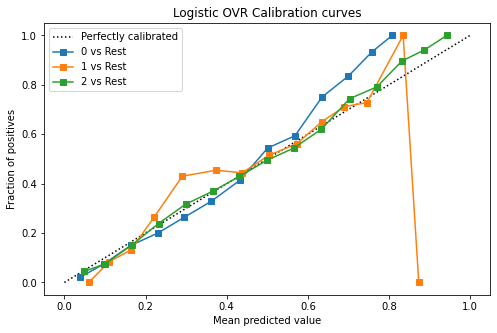

In [74]:
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

# Калибровочные кривые
for l in range(3):
    prob_pos = pipe2.predict_proba(X_pol_test)[:, l]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_encoder[:, l], prob_pos, n_bins=15)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label=f"{l} vs Rest")

plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.title('Logistic OVR Calibration curves')
plt.legend();

plt.show()

**Задание 3.** Обучите на датасете без полиномиальных признаков One-vs-One `SGDClassifier` из `sklearn.linear_model`, который использует стохастический градиентный спуск (узнаете о нем позже) и может обучать как `SVM`, так и, например, `LogReg`, если указать в качестве параметра `loss` либо `hinge`, либо `log` соответственно!

Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg.

In [75]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

In [76]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

### Your code is here
SGDClassifier(loss='log')

pipe_all_all = Pipeline([("scaler", StandardScaler()),
                         ("all_vs_all", OneVsOneClassifier(SGDClassifier()))])

pipe_all_all.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('all_vs_all', OneVsOneClassifier(estimator=SGDClassifier()))])

In [77]:
print(classification_report(y_true=y_test, y_pred=pipe_all_all.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.748     0.521     0.614      5372
           2      0.626     0.870     0.728     11349
           3      0.756     0.536     0.627      9612

    accuracy                          0.677     26333
   macro avg      0.710     0.642     0.656     26333
weighted avg      0.698     0.677     0.668     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()`. При этом переберите всевозможные функции потерь. Таким образом, при `loss = 'hinge'`, мы обучим SVM, при `loss = 'log'` мы обучим логистическую регрессию и т.д.

Используйте прием с Кросс-Валидацией при подборе параметров, как ранее, а также замерьте метрики на тесте.

In [78]:
param_grid = {'one_vs_one__estimator__loss': ['hinge', 'log', 'modified_huber'],
              'one_vs_one__estimator__penalty': ['l1', 'l2'],
              'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1]}

In [79]:
#SGDClassifier(loss='log')

pipe_one_vs_one = Pipeline([('scaler', StandardScaler()), 
                     ('one_vs_one', OneVsOneClassifier(SGDClassifier()))])
#pipe_all_all.set_params(all_vs_all__estimator__loss='log')
pipe_all_all.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('all_vs_all', OneVsOneClassifier(estimator=SGDClassifier()))])

In [80]:
pd.options.display.max_columns = 500

In [81]:
### Your code is here

search_all_all = GridSearchCV(pipe_one_vs_one, param_grid, cv=5)
search_all_all.fit(X_train, y_train)




GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('one_vs_one',
                                        OneVsOneClassifier(estimator=SGDClassifier()))]),
             param_grid={'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1],
                         'one_vs_one__estimator__loss': ['hinge', 'log',
                                                         'modified_huber'],
                         'one_vs_one__estimator__penalty': ['l1', 'l2']})

In [82]:
print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.68062):
{'one_vs_all__estimator__C': 0.001, 'one_vs_all__estimator__penalty': 'l2'}


In [83]:
print(classification_report(y_test, search_all_all.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.747     0.530     0.620      5372
           2      0.631     0.846     0.723     11349
           3      0.745     0.567     0.644      9612

    accuracy                          0.680     26333
   macro avg      0.708     0.648     0.662     26333
weighted avg      0.697     0.680     0.673     26333



Можно ли однозначно сказать, какой подход оказался лучше: One-vs-Rest или One-vs-One?